<a href="https://colab.research.google.com/github/yejin0455/sesac-DL/blob/main/D13_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Mounted at /content/drive


In [ ]:
%matplotlib inline

In [ ]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [ ]:
X_train_scaled = (X_train / 255.0)
X_train_scaled.shape

(60000, 28, 28)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_val_scaled, y_train, y_val = \
  train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
X_train_scaled.shape, X_val_scaled.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential(name="fashion_mnist_model")
  model.add(keras.layers.Flatten(input_shape=(28, 28), name="input"))
  model.add(keras.layers.Dense(100, activation='relu', name="hidden_1"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax', name="output"))
  return model

In [ ]:
def model_fn2(*layers):
  model = keras.Sequential(name="fashion_mnist_model")
  model.add(keras.layers.Flatten(input_shape=(28, 28), name="input"))
  model.add(keras.layers.Dense(100, activation='relu', name="hidden_1"))
  for layer in layers:
    model.add(layer)
  model.add(keras.layers.Dense(10, activation='softmax', name="output"))
  return model

In [ ]:
model = model_fn2()

In [ ]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
a, b, *c = 1, 2, 3, 4, 5

In [ ]:
a, b, c

(1, 2, [3, 4, 5])

In [ ]:
a, b, *c

(1, 2, 3, 4, 5)

In [ ]:
def fn(*args, **kwargs):
  for i, arg in enumerate(args):
    print(f"args[{i}]={arg}")
  for k, v in kwargs.items():
    print(f"{k}={v}")

In [ ]:
fn(1, 2, x=3, y=4, z=5)

args[0]=1
args[1]=2
x=3
y=4
z=5


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                    validation_data=(X_val_scaled, y_val))

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

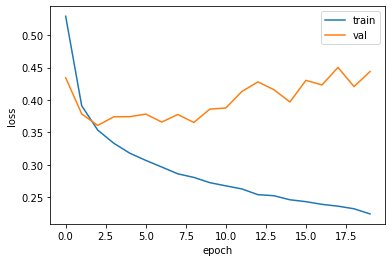

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
optimizers = ['sgd', 'rmsprop', 'adam']
models, histories = [], []
for i, opt in enumerate(optimizers): 
  models.append(model_fn2())
  models[i].compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  histories.append(models[i].fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                                 validation_data=(X_val_scaled, y_val)))

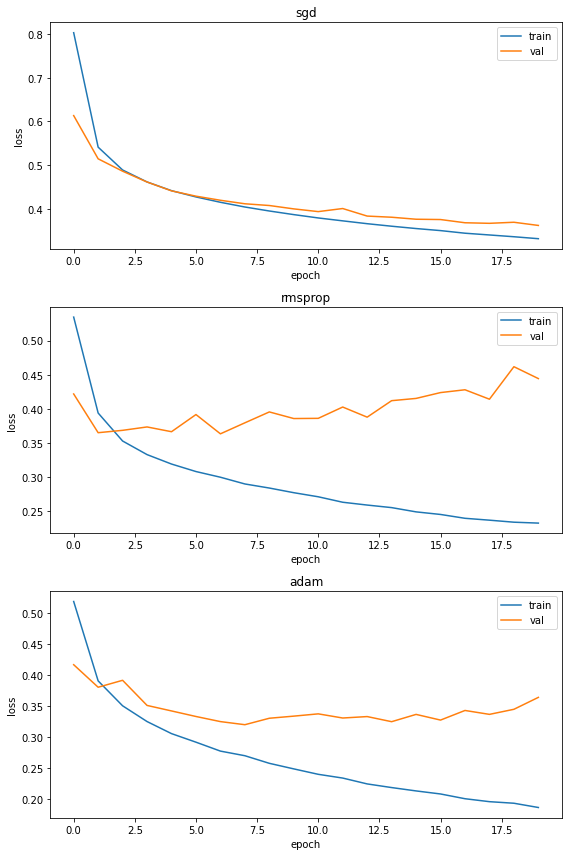

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for i, opt in enumerate(['sgd', 'rmsprop', 'adam']): 
  axes[i].plot(histories[i].history['loss'])
  axes[i].plot(histories[i].history['val_loss'])
  axes[i].set_title(opt)
  axes[i].set_xlabel('epoch')
  axes[i].set_ylabel('loss')
  axes[i].legend(['train', 'val'])
fig.tight_layout()
plt.show()